In [2]:
import requests
import time
import pprint
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import xml.etree.ElementTree as ET
import re
from unicodedata import normalize
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_summary import DataFrameSummary
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
%matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
#!python -m pip install --upgrade pip

In [4]:
tablin = pd.read_csv(r'C:\Users\Marta\Desktop\Rotación 2 SBD\BackUp_Proyecto\Python Scripts\Modelo evolución precios\Datos - copia\tablin.csv', 
                   sep=';', engine="python", decimal=',', encoding="latin1")

In [6]:
fechas = list(tablin.Fecha.drop_duplicates())
dictionary_dates_date_to_num = {}
dictionary_dates_num_to_date = {}
for date_iter in range(len(fechas)):
    dictionary_dates_date_to_num[fechas[date_iter]] = date_iter
    dictionary_dates_num_to_date[date_iter] = fechas[date_iter]

In [7]:
dictionary_dates_num_to_date[56] = '01/01/2019'
dictionary_dates_num_to_date[57] = '01/04/2019'
dictionary_dates_num_to_date[58] = '01/07/2019'
dictionary_dates_num_to_date[59] = '01/10/2019'
dictionary_dates_num_to_date[60] = '01/01/2020'
dictionary_dates_num_to_date[61] = '01/04/2020'
dictionary_dates_num_to_date[62] = '01/07/2020'
dictionary_dates_num_to_date[63] = '01/10/2020'

In [8]:
tablin_preds = tablin.copy()

In [9]:
#LINEAR REGRESSION 

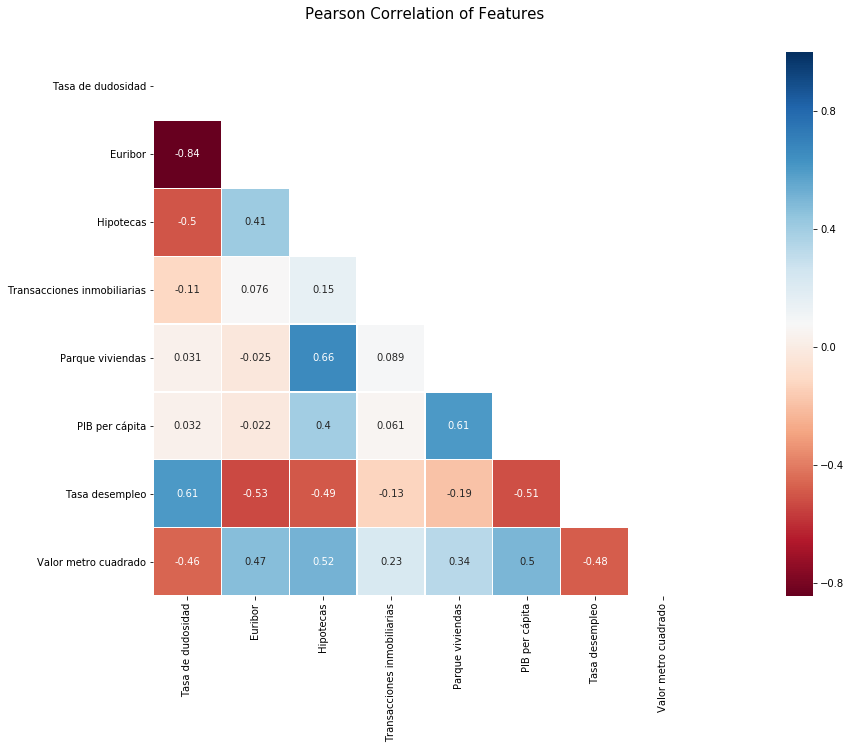

In [10]:
#CORRELATION MATRIX

tablin_corr = tablin.corr()
mask = np.zeros_like(tablin_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(tablin_corr,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

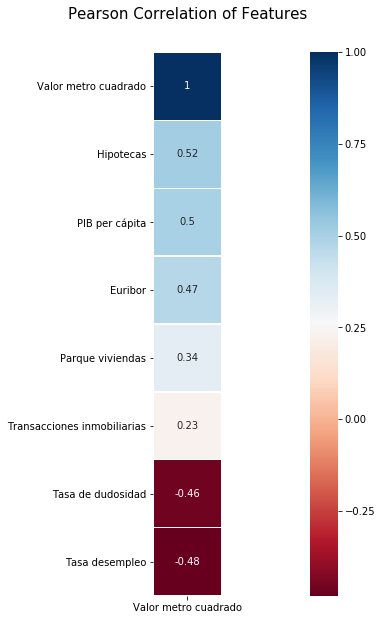

In [11]:
#CORRELATION MATRIX ONLY FOR 'VALOR METRO CUADRADO'

tablin_corr = tablin.corr()
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(tablin_corr[['Valor metro cuadrado']].sort_values(by=['Valor metro cuadrado'],ascending=False)
                        ,linewidths=0.2,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

mean                            1603.55
std                             658.111
variance                         433110
min                              435.49
max                              4337.3
5%                              753.146
25%                             1091.67
50%                             1479.72
75%                             1988.98
95%                             2869.75
iqr                             897.306
kurtosis                       0.201212
skewness                       0.809058
sum                         2.55029e+07
mad                             528.798
cv                             0.410409
zeros_num                             0
zeros_perc                           0%
deviating_of_mean                   100
deviating_of_mean_perc            0.63%
deviating_of_median                 471
deviating_of_median_perc          2.96%
top_correlations                       
counts                            15904
uniques                           15727


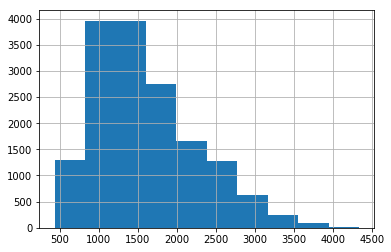

In [12]:
ds_plot = DataFrameSummary(tablin_preds)
ds_plot["Valor metro cuadrado"]

#Skewness should go from -0.5 to 0.5
#The variable is quite skewed to the right
#A normal distribution has kurtosis exactly 3, it is related to outliers. It is deviated if <3 or >3, so this one is OK

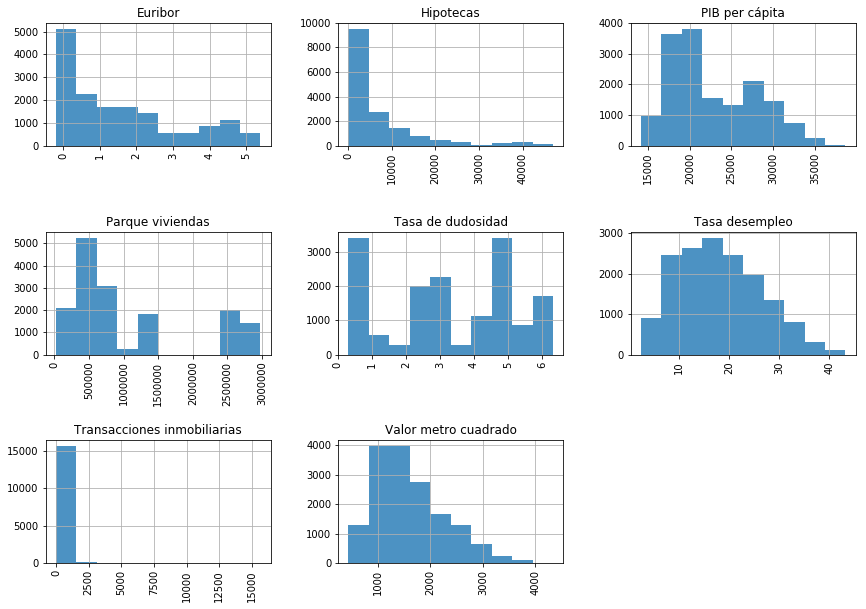

In [13]:
tablin_preds.hist(alpha=0.8, xrot=90)
plt.subplots_adjust(right=2, hspace=0.7, top=2)

In [14]:
tablin_preds.skew(axis = 0, skipna = True) 

Tasa de dudosidad              -0.186053
Euribor                         0.851434
Hipotecas                       2.344631
Transacciones inmobiliarias    11.324296
Parque viviendas                1.019410
PIB per cápita                  0.546161
Tasa desempleo                  0.430611
Valor metro cuadrado            0.809058
dtype: float64

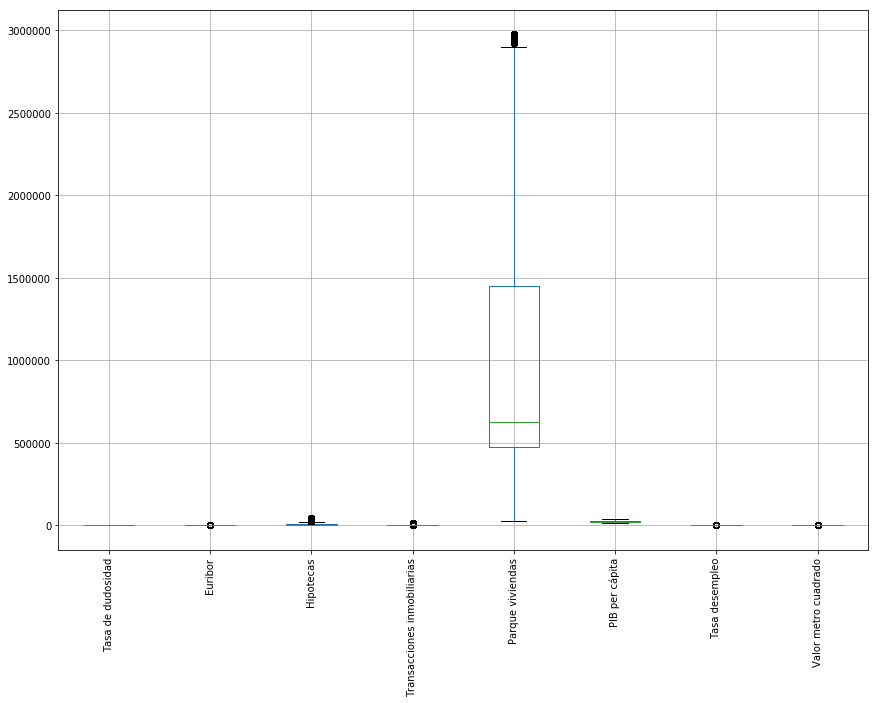

In [15]:
tablin_preds.boxplot(rot=90)
plt.subplots_adjust(right=2, hspace=0.7, top=2)

mean                              1.09062e+06
std                                    911636
variance                          8.31079e+11
min                                     24871
max                               2.97655e+06
5%                                     209438
25%                                    476518
50%                                    626672
75%                               1.44905e+06
95%                               2.90006e+06
iqr                                    972531
kurtosis                            -0.501246
skewness                              1.01941
sum                               1.73452e+10
mad                                    760761
cv                                   0.835891
zeros_num                                   0
zeros_perc                                 0%
deviating_of_mean                           0
deviating_of_mean_perc                     0%
deviating_of_median                       756
deviating_of_median_perc          

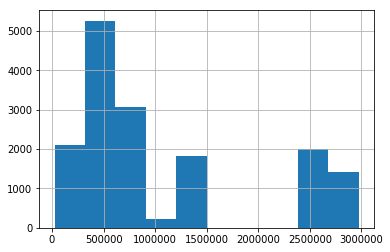

In [16]:
ds_plot = DataFrameSummary(tablin_preds)
ds_plot["Parque viviendas"]

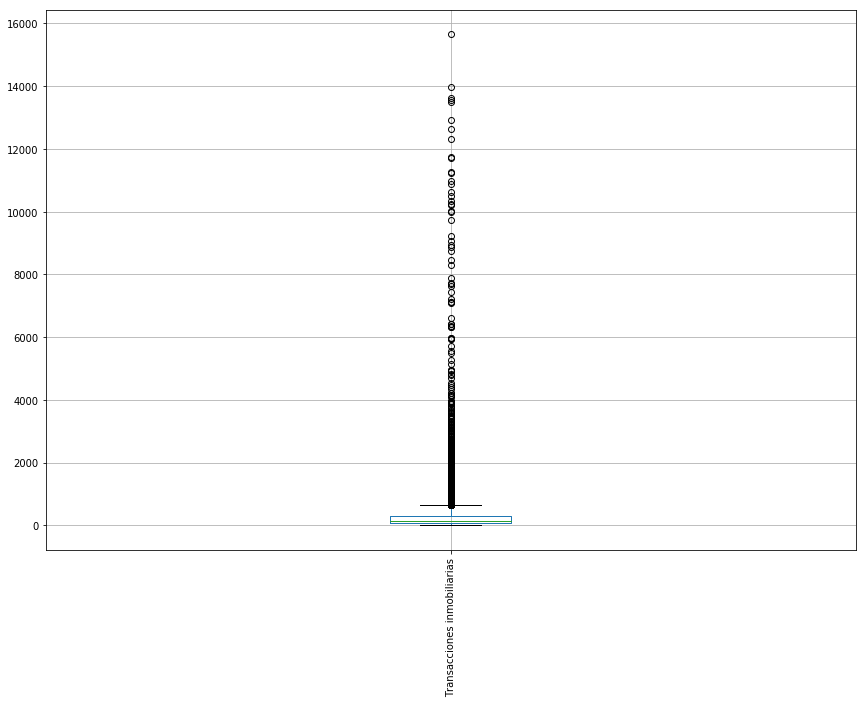

In [17]:
tablin_preds.boxplot(column='Transacciones inmobiliarias', rot=90)
plt.subplots_adjust(right=2, hspace=0.7, top=2)

In [18]:
df = pd.DataFrame(tablin_preds)

In [19]:
df.describe()

,Tasa de dudosidad,Euribor,Hipotecas,Transacciones inmobiliarias,Parque viviendas,PIB per cápita,Tasa desempleo,Valor metro cuadrado
count,15904.000000,15904.000000,15904.000000,15904.000000,1.590400e+04,15904.000000,15904.000000,15904.000000
mean,3.235073,1.556304,6951.350792,289.245661,1.090616e+06,22758.527414,18.163094,1603.549507
std,1.892768,1.640756,8844.485482,648.725826,9.116356e+05,5009.586346,8.145476,658.111307
min,0.313759,-0.191000,20.000000,0.000000,2.487100e+04,14141.000000,2.480000,435.490000
25%,1.713935,0.160750,1506.000000,71.000000,4.765180e+05,18692.000000,11.540000,1091.673125
50%,3.061811,1.230500,3371.500000,142.000000,6.266720e+05,21161.500000,17.530000,1479.715550
75%,4.739467,2.248000,8831.000000,296.000000,1.449049e+06,26976.000000,23.822500,1988.979521
max,6.318655,5.384000,46989.000000,15653.000000,2.976552e+06,38673.000000,43.230000,4337.300000


In [20]:
df.dtypes

Fecha                           object
Municipio                       object
Provincia                       object
Tasa de dudosidad              float64
Euribor                        float64
Hipotecas                      float64
Transacciones inmobiliarias    float64
Parque viviendas               float64
PIB per cápita                 float64
Tasa desempleo                 float64
Valor metro cuadrado           float64
dtype: object

In [21]:
df.skew(axis = 0, skipna = True) 

Tasa de dudosidad              -0.186053
Euribor                         0.851434
Hipotecas                       2.344631
Transacciones inmobiliarias    11.324296
Parque viviendas                1.019410
PIB per cápita                  0.546161
Tasa desempleo                  0.430611
Valor metro cuadrado            0.809058
dtype: float64

In [22]:
df

,Fecha,Municipio,Provincia,Tasa de dudosidad,Euribor,Hipotecas,Transacciones inmobiliarias,Parque viviendas,PIB per cápita,Tasa desempleo,Valor metro cuadrado
0,01/01/2005,Almería,Almería,0.313759,2.335,8156.0,923.0,314757.0,18927.0,8.78,1477.966156
1,01/01/2005,Roquetas de Mar,Almería,0.313759,2.335,8156.0,775.0,314757.0,18927.0,8.78,1506.693984
2,01/01/2005,Ejido (El),Almería,0.313759,2.335,8156.0,681.0,314757.0,18927.0,8.78,1179.711917
3,01/01/2005,Algeciras,Cádiz,0.313759,2.335,8220.0,550.0,559465.0,16370.0,19.12,1360.144144
4,01/01/2005,Arcos de la frontera,Cádiz,0.313759,2.335,8220.0,211.0,559465.0,16370.0,19.12,1061.504696
5,01/01/2005,Cádiz,Cádiz,0.313759,2.335,8220.0,383.0,559465.0,16370.0,19.12,1942.826293
6,01/01/2005,Chiclana de la Frontera,Cádiz,0.313759,2.335,8220.0,575.0,559465.0,16370.0,19.12,1806.105227
7,01/01/2005,Jerez de la Frontera,Cádiz,0.313759,2.335,8220.0,1162.0,559465.0,16370.0,19.12,1214.943776
8,01/01/2005,Línea de la Concepción (La),Cádiz,0.313759,2.335,8220.0,319.0,559465.0,16370.0,19.12,1535.943092
9,01/01/2005,Puerto de Santa María,Cádiz,0.313759,2.335,8220.0,224.0,559465.0,16370.0,19.12,1651.700000


In [23]:
#STANDARDISE
# Create the Scaler object
#scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#df[['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'Parque viviendas', 'PIB per cápita', 'Tasa desempleo', 'Valor metro cuadrado']] = scaler.fit_transform(df[['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'Parque viviendas', 'PIB per cápita', 'Tasa desempleo', 'Valor metro cuadrado']])

In [24]:
#ELIMINATE OUTLIERS FROM VARIABLES WITH HIGH SKEWNESS

df= df[np.abs(df['Transacciones inmobiliarias']-df['Transacciones inmobiliarias'].mean()) <= (3*df['Transacciones inmobiliarias'].std())] 


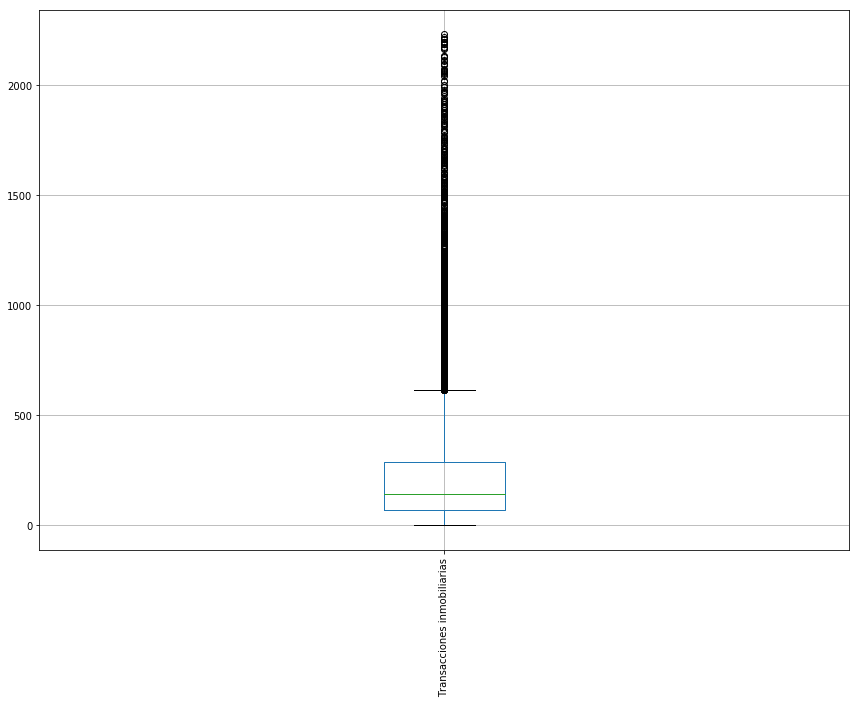

In [25]:
df.boxplot(column='Transacciones inmobiliarias', rot=90)
plt.subplots_adjust(right=2, hspace=0.7, top=2)

mean                            289.246
std                             648.726
variance                         420845
min                                   0
max                               15653
5%                                   30
25%                                  71
50%                                 142
75%                                 296
95%                               906.7
iqr                                 225
kurtosis                        177.667
skewness                        11.3243
sum                         4.60016e+06
mad                             257.513
cv                              2.24282
zeros_num                           103
zeros_perc                        0.65%
deviating_of_mean                   177
deviating_of_mean_perc            1.11%
deviating_of_median                 782
deviating_of_median_perc          4.92%
top_correlations                       
counts                            15904
uniques                            1476


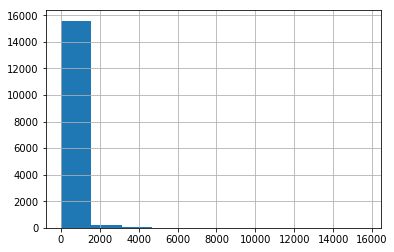

In [26]:
ds_plot1 = DataFrameSummary(tablin_preds)
ds_plot1["Transacciones inmobiliarias"]

mean                            238.188
std                             283.102
variance                          80147
min                                   0
max                                2230
5%                                   30
25%                                  70
50%                                 140
75%                                 288
95%                               800.7
iqr                                 218
kurtosis                        10.8516
skewness                        2.89312
sum                         3.74598e+06
mad                             186.637
cv                              1.18857
zeros_num                           103
zeros_perc                        0.65%
deviating_of_mean                   385
deviating_of_mean_perc            2.45%
deviating_of_median                1027
deviating_of_median_perc          6.53%
top_correlations                       
counts                            15727
uniques                            1303


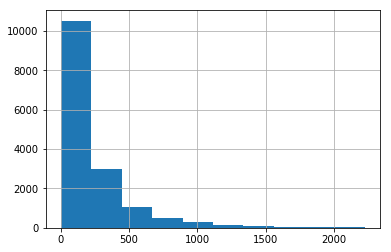

In [27]:
ds_plot2 = DataFrameSummary(df)
ds_plot2["Transacciones inmobiliarias"]

In [28]:
df['Transacciones_inmobiliarias_log'] = np.log(df['Transacciones inmobiliarias']+1)

C:\Users\Marta\Anaconda35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


mean                                                    4.95427
std                                                     1.08101
variance                                                1.16859
min                                                           0
max                                                     7.71021
5%                                                      3.43399
25%                                                     4.26268
50%                                                     4.94876
75%                                                     5.66643
95%                                                     6.68673
iqr                                                     1.40375
kurtosis                                                2.49437
skewness                                               -0.61256
sum                                                     77915.7
mad                                                    0.830716
cv                                      

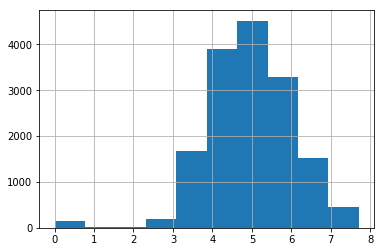

In [29]:
ds_plot2 = DataFrameSummary(df)
ds_plot2["Transacciones_inmobiliarias_log"]

mean                                         6951.35
std                                          8844.49
variance                                 7.82249e+07
min                                               20
max                                            46989
5%                                               443
25%                                             1506
50%                                           3371.5
75%                                             8831
95%                                            24736
iqr                                             7325
kurtosis                                     5.70615
skewness                                     2.34463
sum                                      1.10554e+08
mad                                           6135.8
cv                                           1.27234
zeros_num                                          0
zeros_perc                                        0%
deviating_of_mean                             

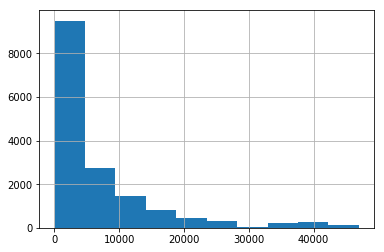

In [30]:
ds_plot1["Hipotecas"]

In [31]:
df= df[np.abs(df['Hipotecas']-df['Hipotecas'].mean()) <= (3*df['Hipotecas'].std())] 

mean                                         5520.21
std                                          5857.79
variance                                 3.43138e+07
min                                               20
max                                            29693
5%                                               431
25%                                             1450
50%                                             3134
75%                                             7891
95%                                            18689
iqr                                             6441
kurtosis                                     2.50288
skewness                                     1.68646
sum                                      8.34158e+07
mad                                          4464.29
cv                                           1.06116
zeros_num                                          0
zeros_perc                                        0%
deviating_of_mean                             

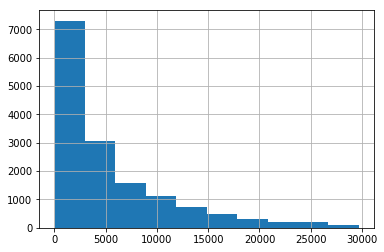

In [32]:
ds_plot2 = DataFrameSummary(df)
ds_plot2["Hipotecas"]

In [33]:
df['Hipotecas_log'] = np.log(df['Hipotecas'])

mean                                                            8.04662
std                                                             1.15422
variance                                                        1.33221
min                                                             2.99573
max                                                             10.2987
5%                                                              6.06611
25%                                                             7.27932
50%                                                             8.05007
75%                                                             8.97348
95%                                                             9.83569
iqr                                                             1.69416
kurtosis                                                     -0.0996328
skewness                                                      -0.348255
sum                                                             

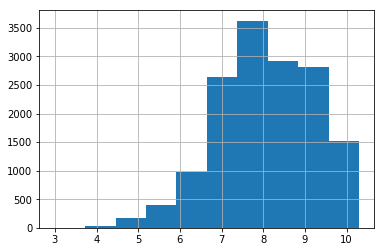

In [34]:
ds_plot2 = DataFrameSummary(df)
ds_plot2["Hipotecas_log"]

In [35]:
df.skew(axis = 0, skipna = True) 

Tasa de dudosidad                 -0.256268
Euribor                            0.964106
Hipotecas                          1.686460
Transacciones inmobiliarias        2.948109
Parque viviendas                   1.218178
PIB per cápita                     0.646064
Tasa desempleo                     0.422634
Valor metro cuadrado               0.867754
Transacciones_inmobiliarias_log   -0.569884
Hipotecas_log                     -0.348255
dtype: float64

In [36]:
df['Euribor_log'] = np.log(df['Euribor']+1)
df['Parque_viviendas_log'] = np.log(df['Parque viviendas'])

mean                                                           0.701542
std                                                            0.644639
variance                                                       0.415559
min                                                           -0.211956
max                                                             1.85379
5%                                                            -0.199671
25%                                                            0.143234
50%                                                            0.795252
75%                                                              1.1455
95%                                                             1.75665
iqr                                                             1.00226
kurtosis                                                       -1.17196
skewness                                                       0.180449
sum                                                             

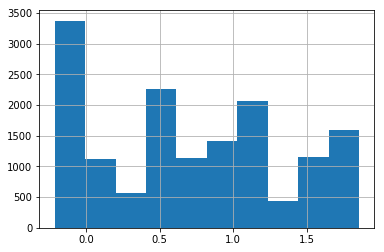

In [37]:
ds_plot2 = DataFrameSummary(df)
ds_plot2["Euribor_log"]

In [39]:
#NORMALIZE

#df[['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'Parque viviendas', 'PIB per cápita', 'Tasa desempleo', 'Valor metro cuadrado', 'Transacciones_inmobiliarias_log','Hipotecas_log','Euribor_log','Parque_viviendas_log']] = preprocessing.normalize(df[['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'Parque viviendas', 'PIB per cápita', 'Tasa desempleo', 'Valor metro cuadrado', 'Transacciones_inmobiliarias_log','Hipotecas_log','Euribor_log','Parque_viviendas_log']]) 


In [40]:
#df= df[np.abs(df['PIB per cápita']-df['PIB per cápita'].mean()) <= (3*df['PIB per cápita'].std())] 
#df= df[np.abs(df['Tasa desempleo']-df['Tasa desempleo'].mean()) <= (3*df['Tasa desempleo'].std())] 
#df= df[np.abs(df['Valor metro cuadrado']-df['Valor metro cuadrado'].mean()) <= (3*df['Valor metro cuadrado'].std())] 
#df= df[np.abs(df['Parque viviendas']-df['Parque viviendas'].mean()) <= (3*df['Parque viviendas'].std())] 
#df= df[np.abs(df['Tasa de dudosidad']-df['Tasa de dudosidad'].mean()) <= (3*df['Tasa de dudosidad'].std())] 
#df= df[np.abs(df['Euribor']-df['Euribor'].mean()) <= (3*df['Euribor'].std())] 
#df= df[np.abs(df['Hipotecas']-df['Hipotecas'].mean()) <= (3*df['Hipotecas'].std())] 
#Remove outliers automatically using a threshold
# 3 is the number of SD from the mean each value has

#df= df[np.abs(df['Parque_viviendas_log']-df['Parque_viviendas_log'].mean()) <= (3*df['Parque_viviendas_log'].std())] 

In [41]:
df.isnull().sum()

Fecha                              0
Municipio                          0
Provincia                          0
Tasa de dudosidad                  0
Euribor                            0
Hipotecas                          0
Transacciones inmobiliarias        0
Parque viviendas                   0
PIB per cápita                     0
Tasa desempleo                     0
Valor metro cuadrado               0
Transacciones_inmobiliarias_log    0
Hipotecas_log                      0
Euribor_log                        0
Parque_viviendas_log               0
dtype: int64

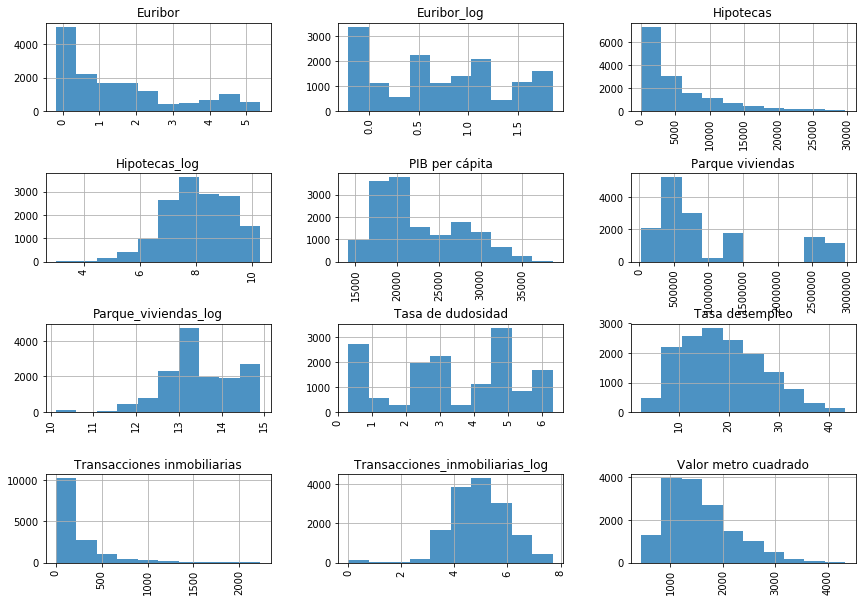

In [42]:
df.hist(alpha=0.8, xrot=90)
plt.subplots_adjust(right=2, hspace=0.7, top=2)

C:\Users\Marta\Anaconda35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


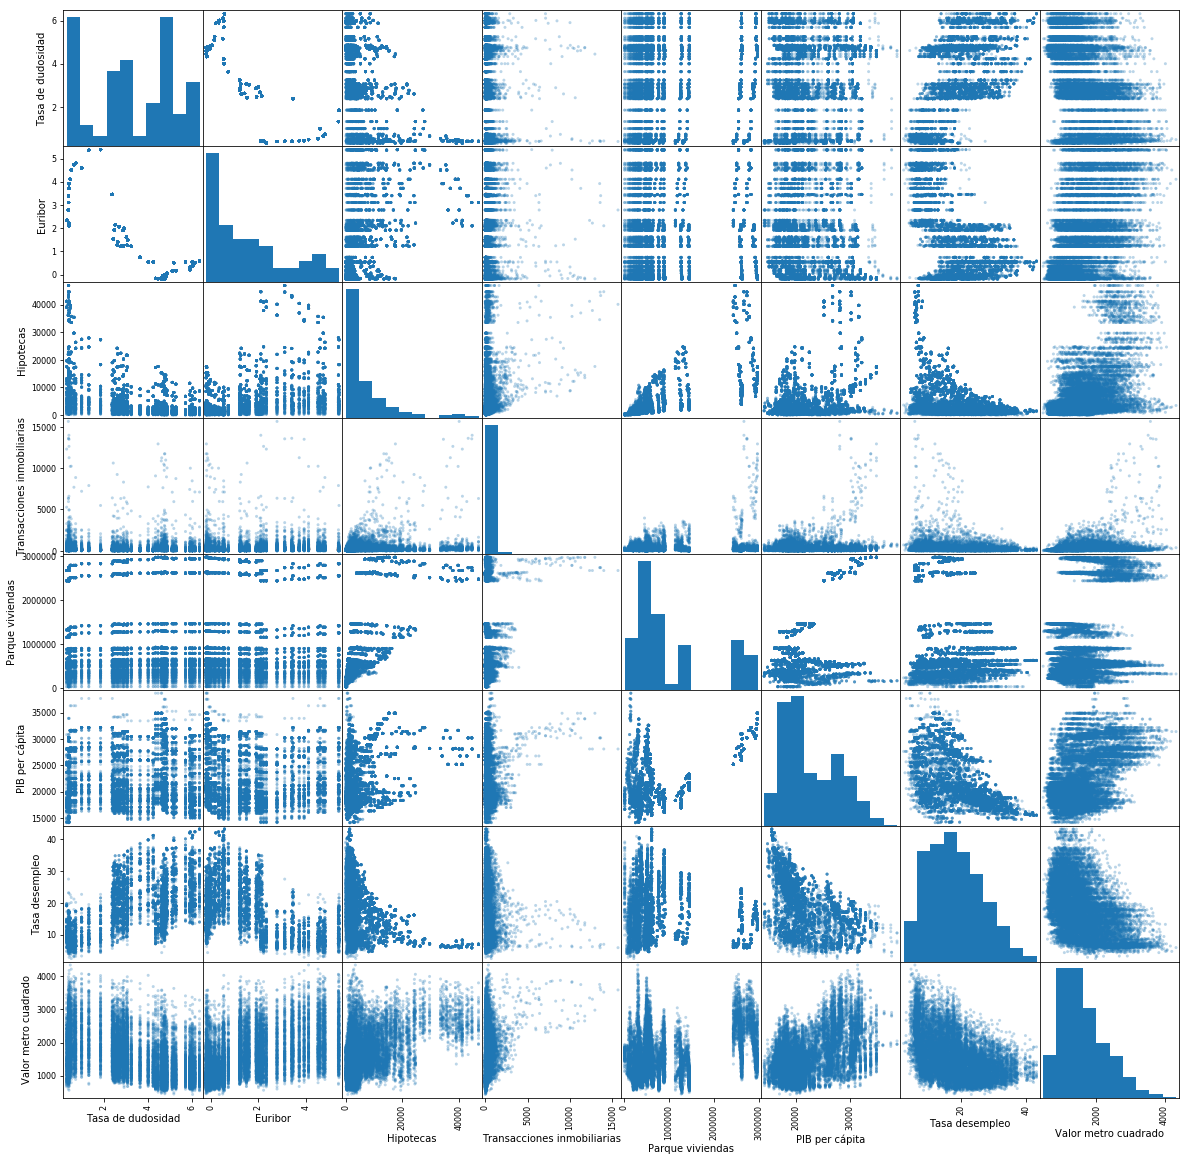

In [43]:
axs= pd.scatter_matrix(tablin_preds, alpha=0.3,figsize=(20, 20),diagonal='hist')

In [ ]:
#COGER TODAS LAS X O COGER COMBINACIONES

In [ ]:
from itertools import combinations

s = ['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'PIB per cápita', 'Parque viviendas',
    'Tasa desempleo']
for combs in (combinations(s, r) for r in range(len(s)+1))  :
    for comb in combs:
        a=['Indice_Fecha']
        a.extend(list(comb))
        print(a)

In [ ]:
print(['Indice_Fecha'].extend(list(comb)))

In [ ]:
poly = PolynomialFeatures( degree = 1 )
linear_regressor = linear_model.LinearRegression()

for munic in list(tablin_preds.Municipio.unique())[:1]:

    data_test_regression = tablin_preds[tablin_preds.Municipio==munic]
    data_test_regression['Indice_Fecha'] = range(len(data_test_regression))
    
    s = ['Tasa de dudosidad', 'Euribor', 'Hipotecas', 'Transacciones inmobiliarias', 'PIB per cápita', 'Parque viviendas',
    'Tasa desempleo']
    for combs in (combinations(s, r) for r in range(len(s)+1))  :
        for comb in combs:
 
            variables = []
            score = []
            variables.extend(list(comb))
            variables.extend(['Indice_Fecha'])

            print(variables)
            x = np.asarray(data_test_regression.loc[:,variables])
            y = np.asarray(data_test_regression.loc[:,['Valor metro cuadrado']])
    
            x_pred = np.asarray(data_test_regression.loc[:,variables])
    
            xt = x[:,-1].reshape( len(x[:,-1]), 1 )
            xt_pred = x_pred[:,-1].reshape( len(x_pred[:,-1]), 1 )

            yt = y.reshape( len(y), 1 )

            X_  = poly.fit_transform( x )
            X_pred = poly.fit_transform( x_pred )

            linear_regressor.fit( X_, yt )
    
            predictions = linear_regressor.predict(X_pred)
            score=linear_regressor.score(X_, yt)
            print("Accuracy", score)
            
            pyplot.title( "Municipio: %s" % munic )
            plot1 = pyplot.plot( xt, yt, c='g' )
            plot2 = pyplot.plot( xt_pred, predictions, c='m' )
    
            list_predictions = [item for sublist in predictions for item in sublist]
            tablin_preds.loc[tablin_preds.Municipio==munic, 'Valores m2 regresión lineal'] = list_predictions

            pyplot.show()

In [ ]:
model =linear_regressor.score(X_, yt)
print('coefficient of determination:', model)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)


In [ ]:
#COGER TODAS LAS VARIABLES ES MEJOR PARA EL MODELO